<a href="https://colab.research.google.com/github/Mumuste21mend/masters-computer-vision-1/blob/master/mulit/tp4/tp4_mul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import sys
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv.imread("DIO.png",0)

In [ ]:
if img is None :
     sys.exit("Could not read image\n")
else:
    img32 = img.astype('float32')
    print(img32.shape)
    padded_img = np.pad(img32,((0,8-img.shape[0]%8),(0,8-img.shape[1]%8)),'constant')
    
    dct = padded_img.copy()
    mat = np.fromfunction(lambda i, j : 1+(1+i+j)  , (8,8) , dtype =int)
    print(dct.shape[0]/8)
    print(dct.shape[1]/8)
    # for i in range(0,padded_img.shape[0],8):
    #     for j in range(0,padded_img.shape[1],8):  
            
    # dct2 = np.uint8(padded_img)
    # cv2_imshow(dct2)
    # k = cv.waitKey(0)

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


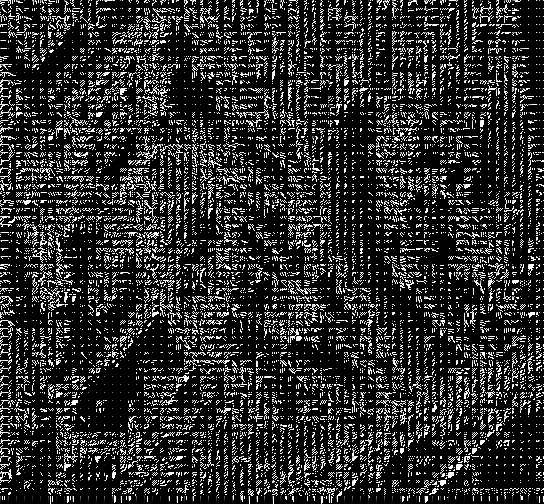

In [ ]:
for i in range(int(dct.shape[0]/8)):
    for j in range(int(dct.shape[1]/8)):
        dct[i*8:8*(i+1)][:,j*8:8*(j+1)] = cv.dct(padded_img[i*8:8*(i+1)][:,j*8:8*(j+1)])
        dct[i*8:8*(i+1)][:,j*8:8*(j+1)] = dct[i*8:8*(i+1)][:,j*8:8*(j+1)]/mat

dct2 = np.uint8(dct)
cv2_imshow(dct2)
k = cv.waitKey(0)
idct = np.copy(dct2)

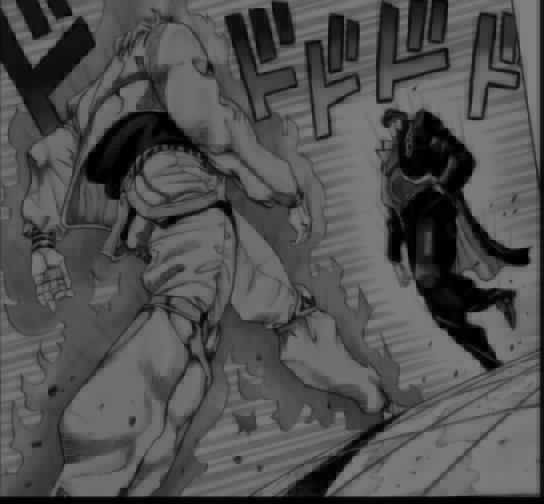

In [ ]:
for i in range(int(dct.shape[0]/8)):
    for j in range(int(dct.shape[1]/8)):
        idct[i*8:8*(i+1)][:,j*8:8*(j+1)] = idct[i*8:8*(i+1)][:,j*8:8*(j+1)]*mat
        idct[i*8:8*(i+1)][:,j*8:8*(j+1)] = cv.idct(dct[i*8:8*(i+1)][:,j*8:8*(j+1)])
        
    
idct2 = np.uint8(idct)
cv2_imshow(idct2)
k = cv.waitKey(0)